In [176]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [73]:
PATH = 'C:/Users/davin/Downloads/'

person  = PATH + '202302_202302_주민등록인구및세대현황_월간.csv'
land    = PATH + '행정구역_20230318172834.csv'
illegal = PATH + '서울특별시 강서구_불법주정자 단속자료_20220318/서울특별시_강서구_불법주정차단속자료_20211231.csv'
illegal_cctv = PATH +'서울시강서구불법주정차위반단속CCTV위치정보.csv'
zipdoro = PATH + 'zipdoro.csv'

In [102]:
person_df = pd.read_csv(person, encoding='cp949')
person_df[['구', '2023년02월_총인구수', '2023년02월_세대수', '2023년02월_세대당 인구', '2023년02월_여자 인구수', '2023년02월_남자 인구수']]

,구,2023년02월_총인구수,2023년02월_세대수,2023년02월_세대당 인구,2023년02월_여자 인구수,2023년02월_남자 인구수
0,NaN,"9,427,583","4,457,982",2.11,"4,859,626","4,567,957"
1,종로구,"141,433","72,773",1.94,"73,034","68,399"
2,중구,"120,555","63,492",1.90,"61,998","58,557"
3,용산구,"218,175","109,778",1.99,"113,315","104,860"
4,성동구,"280,474","133,517",2.10,"144,113","136,361"
5,광진구,"337,071","169,648",1.99,"174,742","162,329"
6,동대문구,"337,293","170,766",1.98,"171,331","165,962"
7,중랑구,"385,129","187,776",2.05,"195,823","189,306"
8,성북구,"430,170","197,673",2.18,"223,417","206,753"
9,강북구,"293,119","144,506",2.03,"150,865","142,254"


In [35]:
person_df.sort_values('2023년02월_총인구수', ascending=False)[:6][['구', '2023년02월_총인구수']]

,구,2023년02월_총인구수
0,NaN,"9,427,583"
24,송파구,"658,868"
16,강서구,"568,666"
23,강남구,"529,962"
11,노원구,"502,820"
21,관악구,"487,430"


In [36]:
land_df = pd.read_csv(land)
land_df[:6]

,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계.1
0,서울시,소계,605.24,100.00,426,466,12859,96471
1,서울시,종로구,23.91,3.95,17,87,279,1475
2,서울시,중구,9.96,1.65,15,74,253,1580
3,서울시,용산구,21.87,3.61,16,36,356,2597
4,서울시,성동구,16.86,2.79,17,17,471,3645
5,서울시,광진구,17.06,2.82,15,7,370,3012


In [37]:
land_df.sort_values('면적 (km²)', ascending=False)[:6][['자치구별(2)', '면적 (km²)']]

,자치구별(2),면적 (km²)
0,소계,605.24
22,서초구,46.98
16,강서구,41.45
23,강남구,39.50
11,노원구,35.44
24,송파구,33.88


In [101]:
merge_outer = pd.merge(person_df, land_df, how='outer',left_on='구', right_on='자치구별(2)')
merge_outer[['구', '2023년02월_총인구수', '면적 (km²)']].head()

,구,2023년02월_총인구수,면적 (km²)
0,NaN,"9,427,583",NaN
1,종로구,"141,433",23.91
2,중구,"120,555",9.96
3,용산구,"218,175",21.87
4,성동구,"280,474",16.86


In [99]:
# merge_outer['per_per_land'] = merge_outer['2023년02월_총인구수']/merge_outer['면적 (km²)']
merge_outer['총인구수'] = merge_outer['2023년02월_총인구수']
for i in range(len(merge_outer['총인구수'])):
    try:
        merge_outer['총인구수'][i] = int(merge_outer['총인구수'][i].replace(',',''))
    except:
        continue

<ipython-input-99-db288658fcc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_outer['총인구수'][i] = int(merge_outer['총인구수'][i].replace(',',''))


In [ ]:
merge_outer['인구밀집도'] = merge_outer['총인구수']/merge_outer['면적 (km²)']

In [ ]:
merge_outer['순위'] = merge_outer['인구밀집도']

In [98]:
# merge_outer.sort_values('인구밀집도', ascending=False)[['구', '2023년02월_총인구수', '면적 (km²)', '인구밀집도']][:6]
merge_outer.sort_values('면적 (km²)', ascending=False)[['구', '총인구수', '면적 (km²)', '인구밀집도']].sort_values('인구밀집도', ascending=False)

,구,총인구수,면적 (km²),인구밀집도
15,양천구,440042,17.41,25275.2
6,동대문구,337293,14.22,23719.6
20,동작구,379622,16.36,23204.3
7,중랑구,385129,18.50,20817.8
5,광진구,337071,17.06,19758
17,구로구,395422,20.12,19653.2
24,송파구,658868,33.88,19447.1
25,강동구,460280,24.59,18718.2
18,금천구,229395,13.02,17618.7
8,성북구,430170,24.58,17500.8


In [4]:
ill_df = pd.read_csv(illegal, encoding='cp949')
ill_df

,단속일,단속시간,단속장소
0,2021-01-01,06:56,강서로19
1,2021-01-01,10:04,등촌로35길 123
2,2021-01-01,11:08,강서로 218
3,2021-01-01,11:25,1373 부근
4,2021-01-01,11:28,하늘길 부근
...,...,...,...
185685,2021-12-31,22:53,공항동 1373
185686,2021-12-31,22:58,서울특별시 강서구 양천로65길 7
185687,2021-12-31,23:03,공항동 1373
185688,2021-12-31,23:03,공항동 1373


In [39]:
ill_df['단속일'] = pd.to_datetime(ill_df['단속일'])
ill_df['단속월'] = ill_df['단속일'].dt.month
ill_month = {}
for i in range(12):
    ill_month[i+1] = sum(ill_df['단속월'] == i+1)
ill_month

{1: 11809,
 2: 12000,
 3: 16150,
 4: 15230,
 5: 14701,
 6: 15789,
 7: 16440,
 8: 18176,
 9: 17424,
 10: 17690,
 11: 16220,
 12: 14061}

<BarContainer object of 12 artists>

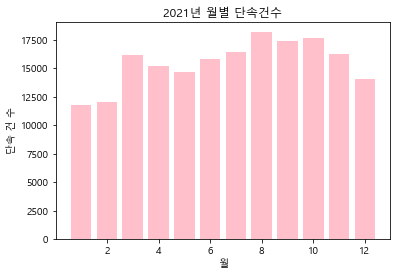

In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2021년 월별 단속건수')
plt.xlabel('월')
plt.ylabel('단속 건 수')
plt.bar(ill_month.keys(), ill_month.values(),color='pink')

In [62]:
ill_month_rev= dict(map(reversed,ill_month.items()))
print("2021년 최대 단속 월: ", ill_month_rev[max(ill_month.values())], "월", max(ill_month.values()))
print("2021년 최소 단속 월: ", ill_month_rev[min(ill_month.values())], "월", min(ill_month.values()))

2021년 최대 단속 월:  8 월 18176
2021년 최소 단속 월:  1 월 11809


In [58]:
ill_df['단속시간'] = pd.to_datetime(ill_df['단속시간'])
ill_df['단속시간(시)'] = ill_df['단속시간'].dt.hour
ill_hour = {}
for i in range(23):
    ill_hour[i+1] = sum(ill_df['단속시간(시)'] == i+1)
ill_hour

{1: 280,
 2: 101,
 3: 40,
 4: 33,
 5: 242,
 6: 818,
 7: 9016,
 8: 7469,
 9: 10585,
 10: 12236,
 11: 10574,
 12: 11407,
 13: 12579,
 14: 13645,
 15: 14835,
 16: 12154,
 17: 11491,
 18: 11543,
 19: 13253,
 20: 15033,
 21: 11672,
 22: 4921,
 23: 1253}

<BarContainer object of 23 artists>

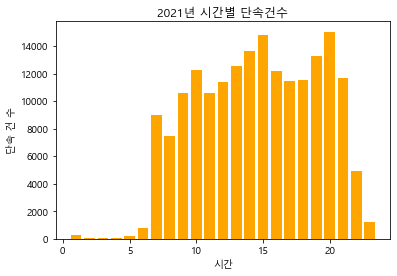

In [59]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2021년 시간별 단속건수')
plt.xlabel('시간')
plt.ylabel('단속 건 수')
plt.bar(ill_hour.keys(), ill_hour.values(), color='orange')

In [63]:
ill_hour_rev= dict(map(reversed,ill_hour.items()))
print("2021년 최대 단속 시간: ", ill_hour_rev[max(ill_hour.values())],"시", max(ill_hour.values()))
print("2021년 최소 단속 시간: ", ill_hour_rev[min(ill_hour.values())],"시", min(ill_hour.values()))

2021년 최대 단속 시간:  20 시 15033
2021년 최소 단속 시간:  4 시 33


In [66]:
ill_hour_rev

{280: 1,
 101: 2,
 40: 3,
 33: 4,
 242: 5,
 818: 6,
 9016: 7,
 7469: 8,
 10585: 9,
 12236: 10,
 10574: 11,
 11407: 12,
 12579: 13,
 13645: 14,
 14835: 15,
 12154: 16,
 11491: 17,
 11543: 18,
 13253: 19,
 15033: 20,
 11672: 21,
 4921: 22,
 1253: 23}

In [69]:
ill_cctv_df = pd.read_csv(illegal_cctv, encoding='cp949')
ill_cctv_df

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 강서구 염창동 53-1,37.553509,126.871100,강서구,염창주민센터 사거리 주변,불법주정차구역
1,가양동 1497,37.567514,126.848718,강서구,가양보람아파트 정문 주변,불법주정차구역
2,가양동 1500,37.567363,126.849810,강서구,한강자이아파트 출입구 주변,불법주정차구역
3,서울 강서구 염창동 254-2,37.550722,126.876424,강서구,무학아파트 105동주변,불법주정차구역
4,서울 강서구 화곡동 1075-25,37.540934,126.840766,강서구,화곡역 인품빌딩 주변,불법주정차구역
...,...,...,...,...,...,...
109,서울 강서구 염창동 95-10,37.551526,126.872685,강서구,염동초등학교 주변,불법주정차구역
110,서울 강서구 마곡동 749-8,37.555923,126.820695,강서구,강서농산물 도매시장 주변,불법주정차구역
111,서울 강서구 방화동 597-18,37.567991,126.811910,강서구,달성빌딩 사거리 주변,불법주정차구역
112,서울 강서구 화곡동 91-14,37.547379,126.844877,강서구,우장초교 통학로 주변,불법주정차구역


In [156]:
# ill_cctv_df['주소'] = ill_cctv_df['고정형CCTV지번주소'].str.split(' ')
addr = []
for i in range(len(ill_cctv_df)):
    temp = ill_cctv_df['고정형CCTV지번주소'][i].replace('-',' ').split(' ')
#     temp = [str(str(ill_cctv_df['고정형CCTV지번주소'][i].split(' ')).split('-')).replace('[','').replace(']','')]
    if '서울' in temp or '강서구' in temp:
        temp.pop(0)
        temp.pop(0)
    addr.append(temp)
ill_cctv_df['주소'] = addr
ill_cctv_df[['고정형CCTV지번주소', '주소']]

,고정형CCTV지번주소,주소
0,서울 강서구 염창동 53-1,"[염창동, 53, 1]"
1,가양동 1497,"[가양동, 1497]"
2,가양동 1500,"[가양동, 1500]"
3,서울 강서구 염창동 254-2,"[염창동, 254, 2]"
4,서울 강서구 화곡동 1075-25,"[화곡동, 1075, 25]"
...,...,...
109,서울 강서구 염창동 95-10,"[염창동, 95, 10]"
110,서울 강서구 마곡동 749-8,"[마곡동, 749, 8]"
111,서울 강서구 방화동 597-18,"[방화동, 597, 18]"
112,서울 강서구 화곡동 91-14,"[화곡동, 91, 14]"


In [170]:
ill_cctv_df[['주소']]
ill_cctv_dong = []
ill_cctv_jibon = []
ill_cctv_jibu =[]
for i in range(len(ill_cctv_df)):
    if len(ill_cctv_df['주소'][i]) == 3:
        ill_cctv_dong.append(ill_cctv_df['주소'][i][0])
        ill_cctv_jibon.append(ill_cctv_df['주소'][i][1])
        ill_cctv_jibu.append(ill_cctv_df['주소'][i][2])
    else:
        ill_cctv_dong.append(ill_cctv_df['주소'][i][0])
        ill_cctv_jibon.append(ill_cctv_df['주소'][i][1])
        ill_cctv_jibu.append('')

ill_cctv_df['행정동명'] = ill_cctv_dong
ill_cctv_df['지번본번'] = ill_cctv_jibon
ill_cctv_df['지번부번'] = ill_cctv_jibu

ill_cctv_df[['고정형CCTV지번주소', '행정동명', '지번본번', '지번부번']]

,고정형CCTV지번주소,행정동명,지번본번,지번부번
0,서울 강서구 염창동 53-1,염창동,53,1
1,가양동 1497,가양동,1497,
2,가양동 1500,가양동,1500,
3,서울 강서구 염창동 254-2,염창동,254,2
4,서울 강서구 화곡동 1075-25,화곡동,1075,25
...,...,...,...,...
109,서울 강서구 염창동 95-10,염창동,95,10
110,서울 강서구 마곡동 749-8,마곡동,749,8
111,서울 강서구 방화동 597-18,방화동,597,18
112,서울 강서구 화곡동 91-14,화곡동,91,14


In [103]:
# ill_cctv_df['동'] = [ill_cctv_df['주소']][0]
# ill_cctv_df['번지'] = [ill_cctv_df['주소']][1]
# ill_cctv_df[['주소', '동', '번지']]
ill_cctv_df['주소'][0][0]

'염창동'

In [74]:
zipdoro_df = pd.read_csv(zipdoro, encoding='cp949')
zipdoro_df

,우편번호,도로명주소
0,1000,서울특별시 강북구 방학로
1,1000,서울특별시 강북구 삼양로177길
2,1000,서울특별시 강북구 삼양로179길
3,1000,서울특별시 강북구 삼양로181길
4,1001,서울특별시 강북구 삼양로
...,...,...
258262,63644,제주특별자치도 서귀포시 대정읍 에듀시티로173번길
258263,63644,제주특별자치도 서귀포시 대정읍 에듀시티로204번길
258264,63644,제주특별자치도 서귀포시 대정읍 에듀시티로228번길
258265,63644,제주특별자치도 서귀포시 대정읍 에듀시티로239번길


In [86]:
zipdoro_df['시'] = zipdoro_df['도로명주소'].str.split(' ').str[0]
zipdoro_df['구'] = zipdoro_df['도로명주소'].str.split(' ').str[1]
zipdoro_df['주소'] = zipdoro_df['도로명주소'].str.split(' ').str[2]
seoul_doro_df = zipdoro_df[zipdoro_df['시'] == '서울특별시']
gangseo_doro_df = seoul_doro_df[seoul_doro_df['구'] == '강서구']

In [87]:
gangseo_doro_df

,우편번호,도로명주소,시,구,주소
24750,7501,서울특별시 강서구 개화동로,서울특별시,강서구,개화동로
24751,7501,서울특별시 강서구 금낭화로17길,서울특별시,강서구,금낭화로17길
24752,7501,서울특별시 강서구 금낭화로26가길,서울특별시,강서구,금낭화로26가길
24753,7502,서울특별시 강서구 개화10가길,서울특별시,강서구,개화10가길
24754,7502,서울특별시 강서구 개화10길,서울특별시,강서구,개화10길
...,...,...,...,...,...
26245,7809,서울특별시 강서구 마곡중앙1로,서울특별시,강서구,마곡중앙1로
26246,7809,서울특별시 강서구 방화대로8길,서울특별시,강서구,방화대로8길
26247,7810,서울특별시 강서구 마곡서1로,서울특별시,강서구,마곡서1로
26248,7810,서울특별시 강서구 마곡서로,서울특별시,강서구,마곡서로


In [98]:
for i in range(len(ill_cctv_df)):
    if ill_cctv_df['주소'][i][0] in gangseo_doro_df['주소']:
        print( gangseo_doro_df['주소'])

,주소
0,"[염창동, 53-1]"
1,"[가양동, 1497]"
2,"[가양동, 1500]"
3,"[염창동, 254-2]"
4,"[화곡동, 1075-25]"
...,...
109,"[염창동, 95-10]"
110,"[마곡동, 749-8]"
111,"[방화동, 597-18]"
112,"[화곡동, 91-14]"


In [118]:
zipcode = PATH + 'zipcode_DB/서울특별시.txt'

In [121]:
zipcode_db = pd.read_csv(zipcode, delimiter = '|')
zipcode_db.columns

Index(['우편번호', '시도', '시도영문', '시군구', '시군구영문', '읍면', '읍면영문', '도로명코드', '도로명',
       '도로명영문', '지하여부', '건물번호본번', '건물번호부번', '건물관리번호', '다량배달처명', '시군구용건물명',
       '법정동코드', '법정동명', '리명', '행정동명', '산여부', '지번본번', '읍면동일련번호', '지번부번',
       '구우편번호', '우편번호일련번호'],
      dtype='object')

In [122]:
zipcode_db[['우편번호','시도', '시군구','읍면','도로명코드','도로명','지하여부', '건물번호본번']]

,우편번호,시도,시군구,읍면,도로명코드,도로명,지하여부,건물번호본번
0,6315,서울특별시,강남구,NaN,116804166204,논현로8길,0,67
1,6325,서울특별시,강남구,NaN,116804166443,선릉로10길,0,16
2,6312,서울특별시,강남구,NaN,116804166128,논현로12길,0,9
3,6314,서울특별시,강남구,NaN,116804166190,논현로6길,0,30
4,6321,서울특별시,강남구,NaN,116803122006,선릉로,0,29
...,...,...,...,...,...,...,...,...
532988,2047,서울특별시,중랑구,NaN,112604118102,동일로140길,0,89
532989,2094,서울특별시,중랑구,NaN,112604118318,봉화산로20길,0,57
532990,2110,서울특별시,중랑구,NaN,112604118559,중랑역로9길,0,11
532991,2111,서울특별시,중랑구,NaN,112604118549,중랑역로3나길,0,46


In [127]:
zipcode_db[['건물번호부번','시군구용건물명','행정동명', '지번본번', '읍면동일련번호', '지번부번']]

,건물번호부번,시군구용건물명,행정동명,지번본번,읍면동일련번호,지번부번
0,0,Artespace,개포4동,1183,1,10
1,0,9COZYVILLE,개포2동,164,1,9
2,6,Classe,개포4동,1196,1,9
3,6,DAONVILL,개포4동,1174,1,3
4,0,개원초등학교,개포1동,660,2,10
...,...,...,...,...,...,...
532988,0,NaN,중화제1동,275,1,1
532989,0,NaN,중화제1동,291,1,32
532990,13,NaN,중화제2동,320,1,77
532991,38,NaN,중화제2동,318,1,75


In [138]:
seocode_df = zipcode_db[['우편번호','시도','시군구', '도로명', '행정동명', '지번본번', '지번부번']]
base_gs_df = seocode_df[seocode_df['시군구'] == '강서구']
base_gs_df[['도로명','우편번호','행정동명', '지번본번', '지번부번']]

,도로명,우편번호,행정동명,지번본번,지번부번
65158,양천로,7573,가양제1동,109,1
65159,양천로47나길,7522,가양제1동,242,3
65160,양천로47가길,7523,가양제1동,272,2
65161,양천로49길,7522,가양제1동,242,3
65162,양천로47나길,7522,가양제1동,242,2
...,...,...,...,...,...
87573,가로공원로89길,7720,화곡제1동,400,96
87574,화곡로53가길,7687,화곡제6동,986,24
87575,강서로8길,7783,화곡제2동,847,8
87576,곰달래로47길,7748,화곡제2동,866,24


In [173]:
# 불법주정차 CCTV 지역
# ill_cctv_df[['고정형CCTV지번주소']]
ill_cctv_df[['행정동명', '지번본번', '지번부번']]

,행정동명,지번본번,지번부번
0,염창동,53,1
1,가양동,1497,
2,가양동,1500,
3,염창동,254,2
4,화곡동,1075,25
...,...,...,...
109,염창동,95,10
110,마곡동,749,8
111,방화동,597,18
112,화곡동,91,14


In [187]:
base_gs_df['행정동 요약'] = base_gs_df['행정동명'].split('제','')
base_gs_df['행정동 요약']
# base_gs_df[['행정동명']]

<ipython-input-187-357e5e0f16b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_gs_df['행정동 요약'] = base_gs_df['행정동명'].replace('제','')


65158    가양제1동
65159    가양제1동
65160    가양제1동
65161    가양제1동
65162    가양제1동
         ...  
87573    화곡제1동
87574    화곡제6동
87575    화곡제2동
87576    화곡제2동
87577    화곡제1동
Name: 행정동 요약, Length: 22420, dtype: object